In [1]:
from cell_wireless import *
from wmmse import wmmse_cell_network

In [13]:
K = 1  # number of BS(s)
N = 10  # number of users
R = 0  # radius

num_train = 100  # number of training samples
num_test = 10  # number of test samples

reg = 1e-2
pmax = 1
var_db = 10
var = 1 / 10 ** (var_db / 10)

X_train, pos_train, adj_train = generate_channels_cell_wireless(K, N, num_train, var, R)
X_test, pos_test, adj_test = generate_channels_cell_wireless(K, N, num_test, var, R)
# print(channel_matrices.shape)
# print(positions.shape)
# print(adj_matrix.shape)
#
# gcn_model = GCNet()

p_wmmse_train = wmmse_cell_network(X_train, np.ones((num_train, K, N)) * pmax, np.ones((num_train, K, N)), np.ones((num_train, K, N)) * pmax, np.ones((num_train, K, N)) * var)

p_wmmse_test = wmmse_cell_network(X_test, np.ones((num_test, K, N)) * pmax, np.ones((num_test, K, N)),
                             np.ones((num_test, K, N)) * pmax, np.ones((num_test, K, N)) * var)

Generating Data for training and testing
Generating Data for training and testing
Solving the cell network problem with WMMSE
Solving the cell network problem with WMMSE


In [14]:
supervised_loss_training = []
unsupervised_loss_training = []
supervised_loss_testing = []
ubsupervised_loss_testing = []

In [15]:
# region Unsupervied Learning
train_data = process_data(X_train, pmax, var)
test_data = process_data(X_test, pmax, var)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.is_available())
gcn_model = GCNet().to(device)

optimizer = torch.optim.Adam(gcn_model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.9)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=1)
test_loader = DataLoader(test_data, batch_size=2000, shuffle=False, num_workers=1)

for epoch in range(1, 200):
    loss1 = model_training(reg, gcn_model, train_loader, device, num_train, optimizer)
    supervised_loss_training.append(loss1)
    if epoch % 8 == 0:
        loss2 = model_testing(reg, gcn_model, test_loader, device, num_train)
        supervised_loss_testing.append(loss2)
        print('Epoch {:03d}, Train Loss: {:.4f}, Val Loss: {:.4f}'.format(
            epoch, loss1, loss2))
    scheduler.step()
# endregion

False
Epoch 008, Train Loss: -0.4781, Val Loss: -0.0415
Epoch 016, Train Loss: -0.6038, Val Loss: -0.0415
Epoch 024, Train Loss: -1.0760, Val Loss: -0.0416
Epoch 032, Train Loss: -0.6965, Val Loss: -0.0416
Epoch 040, Train Loss: -0.7250, Val Loss: -0.0415
Epoch 048, Train Loss: -0.4098, Val Loss: -0.0415
Epoch 056, Train Loss: -1.6501, Val Loss: -0.0417
Epoch 064, Train Loss: -0.6524, Val Loss: -0.0419
Epoch 072, Train Loss: -0.7613, Val Loss: -0.0418
Epoch 080, Train Loss: -0.8087, Val Loss: -0.0419
Epoch 088, Train Loss: -1.6908, Val Loss: -0.0421
Epoch 096, Train Loss: -0.5436, Val Loss: -0.0420
Epoch 104, Train Loss: -1.0191, Val Loss: -0.0420
Epoch 112, Train Loss: -0.2027, Val Loss: -0.0421
Epoch 120, Train Loss: -0.8587, Val Loss: -0.0423
Epoch 128, Train Loss: -0.2494, Val Loss: -0.0421
Epoch 136, Train Loss: -1.0379, Val Loss: -0.0421
Epoch 144, Train Loss: -0.3949, Val Loss: -0.0422
Epoch 152, Train Loss: -0.5758, Val Loss: -0.0422
Epoch 160, Train Loss: -0.4992, Val Loss: -0

In [16]:
# region Supervised learning
train_data = process_data(X_train, pmax, var, p_wmmse_train)
test_data = process_data(X_test, pmax, var, p_wmmse_test)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.is_available())
gcn_model = GCNet().to(device)

optimizer = torch.optim.Adam(gcn_model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.9)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=1)
test_loader = DataLoader(test_data, batch_size=2000, shuffle=False, num_workers=1)

for epoch in range(1, 200):0
    loss1 = model_supervised_training(reg, gcn_model, train_loader, device, num_train, optimizer)
    unsupervised_loss_training.append(loss1)
    if epoch % 8 == 0:
        loss2 = model_supervised_testing(reg, gcn_model, test_loader, device, num_train)
        ubsupervised_loss_testing.append(loss2)
        print('Epoch {:03d}, Train Loss: {:.4f}, Val Loss: {:.4f}'.format(
            epoch, loss1, loss2))
    scheduler.step()
# endregion
#
# torch.save(gcn_model.state_dict(), 'model.pth')

False
Epoch 008, Train Loss: 0.2254, Val Loss: 0.0220
Epoch 016, Train Loss: 0.1974, Val Loss: 0.0190
Epoch 024, Train Loss: 0.1733, Val Loss: 0.0163
Epoch 032, Train Loss: 0.1538, Val Loss: 0.0142
Epoch 040, Train Loss: 0.1375, Val Loss: 0.0126
Epoch 048, Train Loss: 0.1227, Val Loss: 0.0114
Epoch 056, Train Loss: 0.1052, Val Loss: 0.0100
Epoch 064, Train Loss: 0.0888, Val Loss: 0.0088
Epoch 072, Train Loss: 0.0753, Val Loss: 0.0078
Epoch 080, Train Loss: 0.0641, Val Loss: 0.0071
Epoch 088, Train Loss: 0.0559, Val Loss: 0.0065
Epoch 096, Train Loss: 0.0497, Val Loss: 0.0061
Epoch 104, Train Loss: 0.0449, Val Loss: 0.0058
Epoch 112, Train Loss: 0.0415, Val Loss: 0.0056
Epoch 120, Train Loss: 0.0388, Val Loss: 0.0053
Epoch 128, Train Loss: 0.0368, Val Loss: 0.0052
Epoch 136, Train Loss: 0.0352, Val Loss: 0.0050
Epoch 144, Train Loss: 0.0340, Val Loss: 0.0050
Epoch 152, Train Loss: 0.0330, Val Loss: 0.0049
Epoch 160, Train Loss: 0.0322, Val Loss: 0.0049
Epoch 168, Train Loss: 0.0316, Val

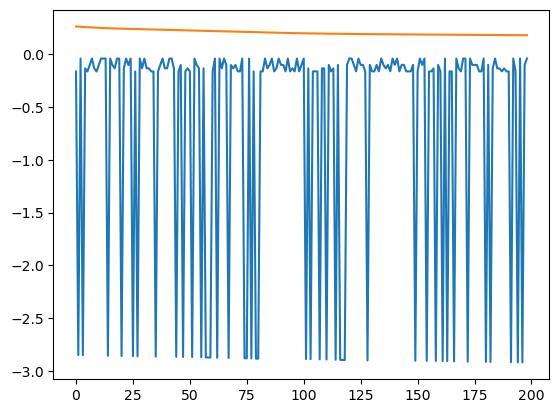

In [12]:
import matplotlib.pyplot as plt

plt.plot(supervised_loss_training, label='Supervised Training Loss')
plt.plot(unsupervised_loss_training, label='Supervised Training Loss')
plt.show()


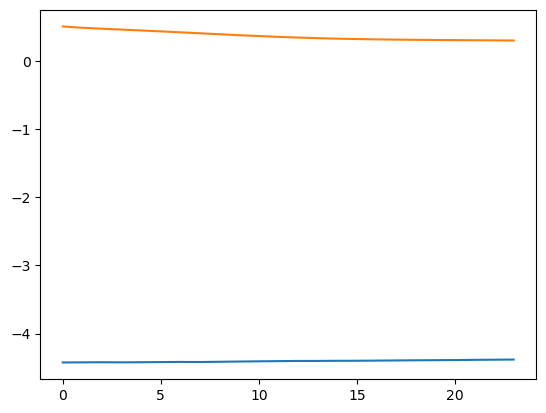

In [9]:

plt.plot(supervised_loss_testing, label='Supervised Training Loss')
plt.plot(ubsupervised_loss_testing, label='Supervised Training Loss')
plt.show()

In [ ]:
print()